### 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns 
from scipy import stats
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, precision_score, average_precision_score, recall_score, f1_score, fbeta_score
import warnings 
import time

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use("ggplot")
np.set_printoptions(precision = 4, suppress = True)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings("ignore")

### 2. Load Dataset

In [3]:
df = pd.read_csv('creditcard.csv')

### 3. Explore Dataset

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 4. Data Imbalance Check

In [8]:
class_counts = df["Class"].value_counts()

In [9]:
print("Class Distribution:")
print(class_counts)
print(f"\nFraud Percentage: {100 * class_counts[1] / len(df):.3f}%")
print(f"Not-Fraud Percentage: {100 * class_counts[0] / len(df):.3f}%")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.173%
Not-Fraud Percentage: 99.827%


### 5. Visualize Class imbalance 

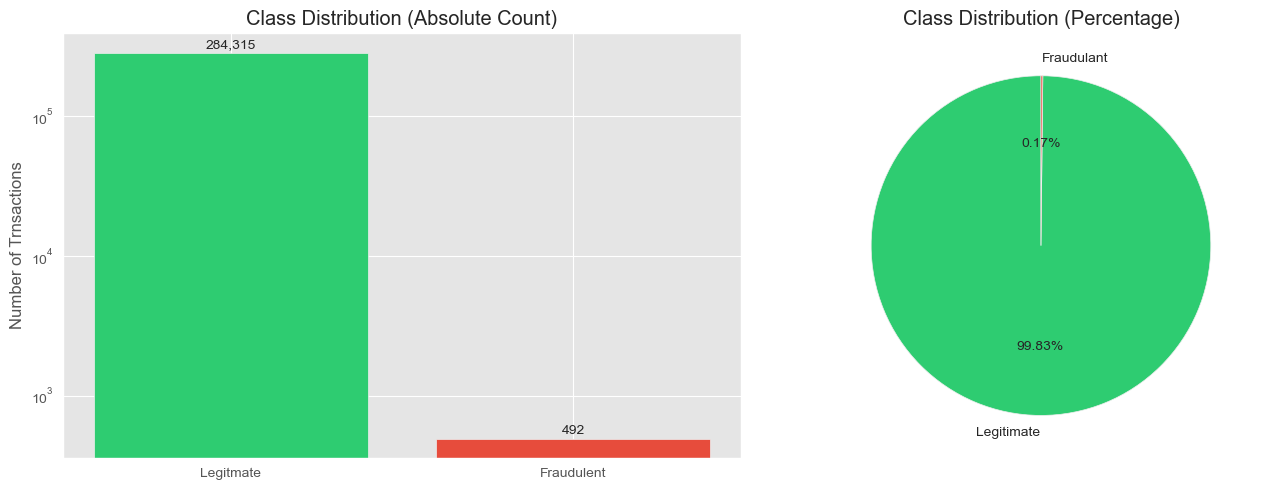

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Bar plot
bars = axes[0].bar(['Legitmate', 'Fraudulent'], class_counts.values, color = ['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Number of Trnsactions')
axes[0].set_title('Class Distribution (Absolute Count)')
axes[0].set_yscale('log')

axes[0].bar_label(bars, labels = [f'{v:,}' for v in class_counts.values], label_type = 'edge', fontsize = 10, padding = 1)

# Pie Chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts.values, labels = ['Legitimate','Fraudulant'], autopct = '%1.2f%%', colors = colors, startangle = 90)
axes[1].set_title('Class Distribution (Percentage)')
plt.tight_layout()
plt.savefig('figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 6. Feature Analysis 

In [11]:
day1_mask = df["Time"] / 3600 < 24
day2_mask = df["Time"] / 3600 >= 24

day1_fraud = df[(df["Class"] == 1) & day1_mask]["Time"] / 3600
day2_fraud = (df[(df["Class"] == 1) & day2_mask]["Time"] / 3600) -24

day1_legit = df[(df["Class"] == 0) & day1_mask]["Time"] / 3600
day2_legit = (df[(df["Class"] == 0) & day2_mask]["Time"] / 3600) -24

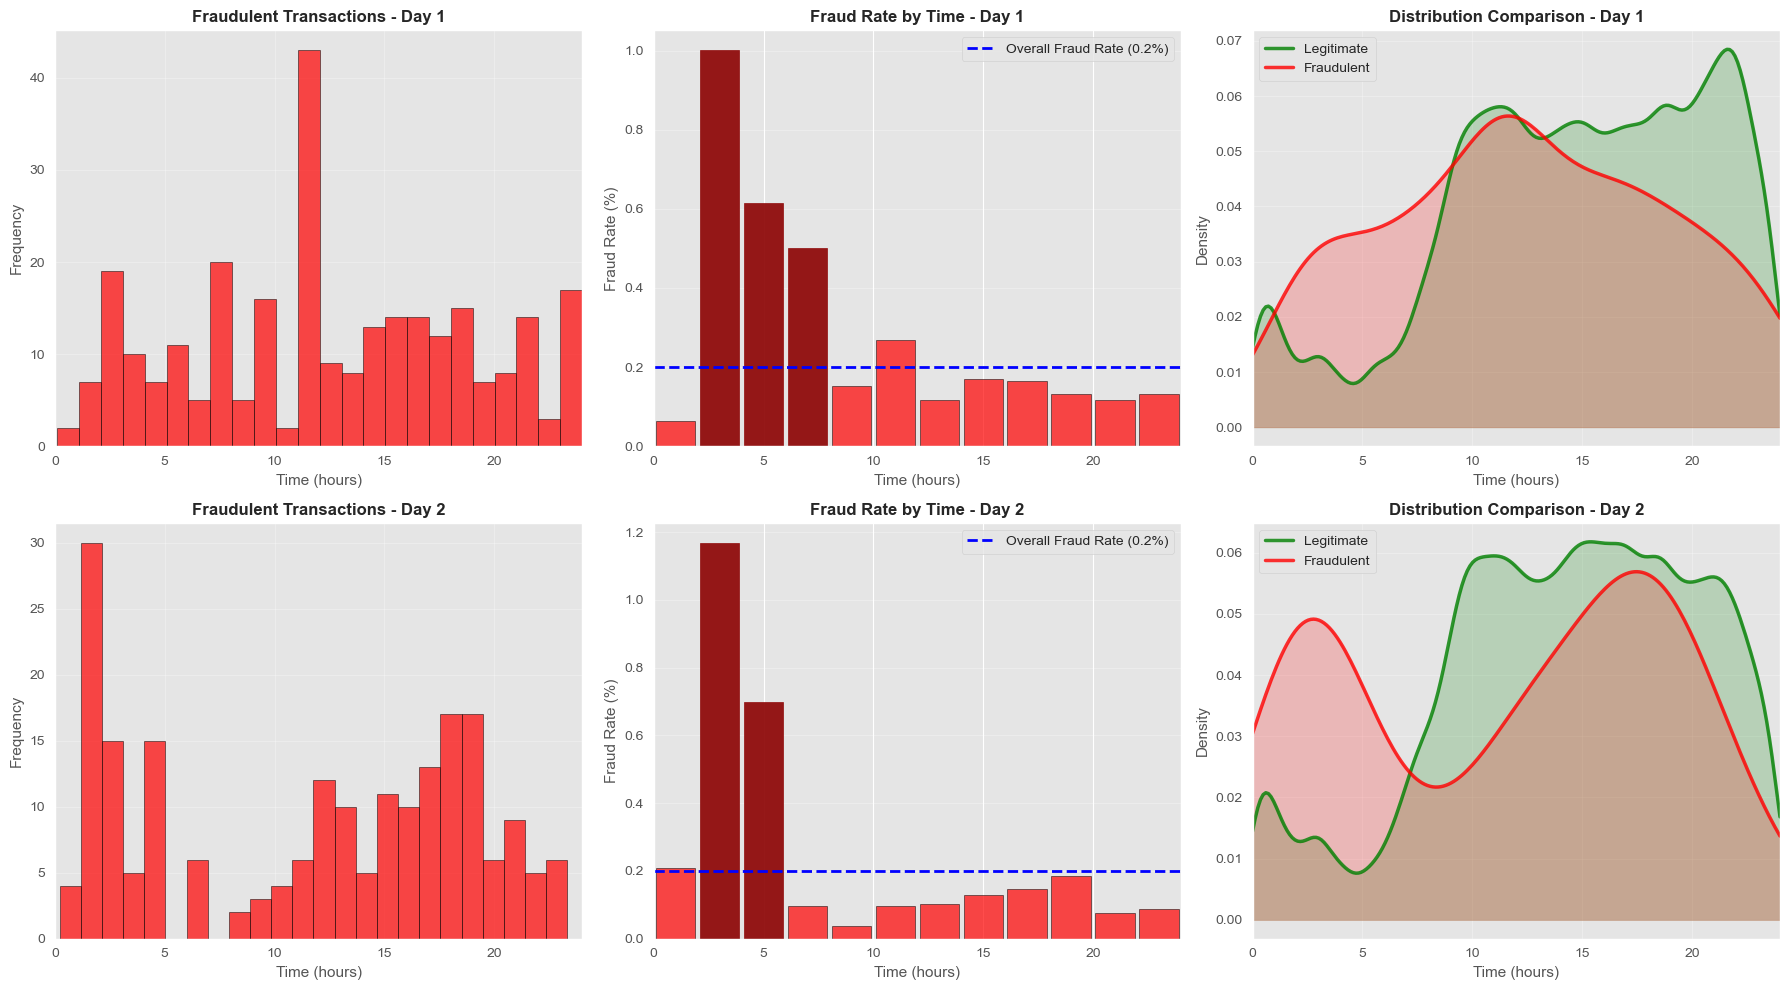

In [12]:
fig, axes = plt.subplots(2, 3, figsize = (18, 10))

# Day 1 : Fraudulent Transaction Volume
axes[0, 0].hist(day1_fraud, bins = 24, alpha = 0.7, color = "red", edgecolor = "black")
axes[0, 0].set_xlabel("Time (hours)", fontsize = 11)
axes[0, 0].set_ylabel("Frequency", fontsize = 11)
axes[0, 0].set_title("Fraudulent Transactions - Day 1", fontsize = 12, fontweight = "bold")
axes[0, 0].set_xlim(0, 24)
axes[0, 0].grid(True, alpha = 0.3)

# Day 1: Fraud Rate by Time
time_bins_day = np.linspace(0, 24, 13)
legit_counts_d1, _ = np.histogram(day1_legit, bins = time_bins_day)
fraud_counts_d1, _ = np.histogram(day1_fraud, bins = time_bins_day)
fraud_rate_d1 = fraud_counts_d1/ (legit_counts_d1 + fraud_counts_d1 + 1e-10) *100
bin_centers_day = (time_bins_day[:-1] + time_bins_day[1:]) / 2
bars_d1 = axes[0, 1].bar(bin_centers_day, fraud_rate_d1, width = 1.8, color = "red", alpha = 0.7, edgecolor = "black")
axes[0, 1].axhline(y = 0.2, color = "blue", linestyle = "--", linewidth = 2, label = "Overall Fraud Rate (0.2%)")

# Highlight hisg-risk periods
for i, rate in enumerate(fraud_rate_d1):
    if rate > 0.5:
        bars_d1[i].set_color("darkred")
        bars_d1[i].set_alpha(0.9)

axes[0, 1].set_xlabel("Time (hours)", fontsize=11)
axes[0, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
axes[0, 1].set_title("Fraud Rate by Time - Day 1", fontsize=12, fontweight="bold")
axes[0, 1].set_xlim(0, 24)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis="y")

# Day 1: KDE
legit_kde_d1 = stats.gaussian_kde(day1_legit)
fraud_kde_d1 = stats.gaussian_kde(day1_fraud)
time_range_day = np.linspace(0, 24, 200)

axes[0, 2].plot(time_range_day, legit_kde_d1(time_range_day), color = "green", linewidth = 2.5, label = "Legitimate", alpha = 0.8)
axes[0, 2].plot(time_range_day, fraud_kde_d1(time_range_day), color = "red", linewidth = 2.5, label = "Fraudulent", alpha = 0.8)
axes[0, 2].fill_between( time_range_day, legit_kde_d1(time_range_day), alpha = 0.2, color = "green")
axes[0, 2].fill_between(time_range_day, fraud_kde_d1(time_range_day), alpha = 0.2, color = "red")
axes[0, 2].set_xlabel("Time (hours)", fontsize=11)
axes[0, 2].set_ylabel("Density", fontsize=11)
axes[0, 2].set_title("Distribution Comparison - Day 1", fontsize=12, fontweight="bold")
axes[0, 2].set_xlim(0, 24)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, alpha=0.3)

# Day 2: Fraudulent transaction volume
axes[1, 0].hist(day2_fraud, bins = 24, alpha = 0.7, color = "red", edgecolor = "black")
axes[1, 0].set_xlabel("Time (hours)", fontsize = 11)
axes[1, 0].set_ylabel("Frequency", fontsize = 11)
axes[1, 0].set_title("Fraudulent Transactions - Day 2", fontsize = 12, fontweight = "bold")
axes[1, 0].set_xlim(0, 24)
axes[1, 0].grid(True, alpha = 0.3)

# Day 2: Fraud rate by time
legit_counts_d2, _ = np.histogram(day2_legit, bins = time_bins_day)
fraud_counts_d2, _ = np.histogram(day2_fraud, bins = time_bins_day)
fraud_rate_d2 = fraud_counts_d2 / (legit_counts_d2 + fraud_counts_d2 + 1e-10) * 100

bars_d2 = axes[1, 1].bar(bin_centers_day, fraud_rate_d2, width = 1.8, color = "red", alpha = 0.7, edgecolor = "black")
axes[1, 1].axhline(y = 0.2, color = "blue", linestyle = "--", linewidth = 2, label = "Overall Fraud Rate (0.2%)")

# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d2):
    if rate > 0.5:
        bars_d2[i].set_color("darkred")
        bars_d2[i].set_alpha(0.9)

axes[1, 1].set_xlabel("Time (hours)", fontsize = 11)
axes[1, 1].set_ylabel("Fraud Rate (%)", fontsize = 11)
axes[1, 1].set_title("Fraud Rate by Time - Day 2", fontsize = 12, fontweight = "bold")
axes[1, 1].set_xlim(0, 24)
axes[1, 1].legend(fontsize = 10)
axes[1, 1].grid(True, alpha = 0.3, axis = "y")

# Day 2: KDE
legit_kde_d2 = stats.gaussian_kde(day2_legit)
fraud_kde_d2 = stats.gaussian_kde(day2_fraud)

axes[1, 2].plot(time_range_day,legit_kde_d2(time_range_day),color = "green",linewidth = 2.5,label = "Legitimate",alpha = 0.8)
axes[1, 2].plot(time_range_day, fraud_kde_d2(time_range_day), color = "red", linewidth = 2.5, label = "Fraudulent", alpha = 0.8)
axes[1, 2].fill_between(time_range_day, legit_kde_d2(time_range_day), alpha = 0.2, color = "green")
axes[1, 2].fill_between(time_range_day, fraud_kde_d2(time_range_day), alpha = 0.2, color = "red")
axes[1, 2].set_xlabel("Time (hours)", fontsize = 11)
axes[1, 2].set_ylabel("Density", fontsize = 11)
axes[1, 2].set_title("Distribution Comparison - Day 2", fontsize = 12, fontweight = "bold")
axes[1, 2].set_xlim(0, 24)
axes[1, 2].legend(fontsize = 10)
axes[1, 2].grid(True, alpha = 0.3)

plt.tight_layout()
plt.savefig("figures/temporal_analysis_by_day.png", dpi=300, bbox_inches="tight")
plt.show()


### 7. Data preparation

In [13]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

In [15]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 227845
Test set size: 56962

Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64

Test set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64


### 8. Feature Scaling

In [16]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Convert back to Dataframe for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

### 9. Smote - Balancing training set

In [18]:
print("Before SMOTE:", y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", y_train.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


### 10. Prediction Models

In [19]:
def evaluate_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    subtitle=None,
    verbose=False,
    show_confusion_matrix=True,
):
    # Print header
    header = f"{model_name}"

    if verbose:
        print("=" * len(header))
        print(header)
        print("=" * len(header))

    # Train model with timing
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    if training_time < 60:
        time_str = f"{training_time:.4f} seconds"
    elif training_time < 3600:
        minutes = int(training_time // 60)
        seconds = training_time % 60
        time_str = f"{minutes} minutes and {seconds:.2f} seconds"
    else:
        hours = int(training_time // 3600)
        remaining_seconds = training_time % 3600
        minutes = int(remaining_seconds // 60)
        seconds = remaining_seconds % 60
        time_str = f"{hours} hours, {minutes} minutes and {seconds:.2f} seconds"

    print(f"\nTraining Time: {time_str}")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification Report
    if verbose:
        print("\nClassification Report:")
        print(
            classification_report(
                y_test,
                y_pred,
                target_names = ["Fraudulent", "Legitimate"],
                labels = [1, 0],
            )
        )

    # ROC AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    if verbose:
        print(f"\nROC AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels = [1, 0])

    if show_confusion_matrix:
        # Plot Confusion Matrix
        plt.figure(figsize = (7, 5))
        ax = plt.gca()

        sns.heatmap(
            cm,
            annot = True,
            fmt = "d",
            cmap = "RdYlGn_r",
            xticklabels = ["Fraudulent", "Legitimate"],
            yticklabels = ["Fraudulent", "Legitimate"],
            cbar_kws = {"label": "Count"},
            linewidths = 2,
            linecolor = "white",
            square = True,
            annot_kws = {"size": 16, "weight": "bold"},
        )

        # Title with optional subtitle
        title = f"Confusion Matrix - {model_name}"
        if subtitle:
            title += f"\n{subtitle}"
        plt.title(title, fontweight = "bold", fontsize = 14, pad = 20)

        plt.ylabel("Real (Actual)", fontweight = "bold", fontsize = 12)
        plt.xlabel("Prediction (Predicted)", fontweight = "bold", fontsize = 12)

        # Add TP, FN, FP, TN labels
        plt.text(
            0.5,
            0.25,
            "TP",
            ha = "center",
            va = "center",
            fontsize = 14,
            color = "white",
            weight = "bold",
            bbox = dict(boxstyle = "round", pad = 0.5, facecolor = "darkgreen", alpha = 0.8),
        )
        plt.text(
            1.5,
            0.25,
            "FN",
            ha = "center",
            va = "center",
            fontsize = 14,
            color = "white",
            weight = "bold",
            bbox = dict(boxstyle = "round", pad = 0.5, facecolor = "darkred", alpha = 0.8),
        )
        plt.text(
            0.5,
            1.25,
            "FP",
            ha = "center",
            va = "center",
            fontsize = 14,
            color = "white",
            weight = "bold",
            bbox = dict(boxstyle = "round", pad = 0.5, facecolor = "darkred", alpha = 0.8),
        )
        plt.text(
            1.5,
            1.25,
            "TN",
            ha = "center",
            va = "center",
            fontsize = 14,
            color = "white",
            weight = "bold",
            bbox = dict(boxstyle = "round", pad = 0.5, facecolor = "lightgreen", alpha = 0.8),
        )

        plt.tight_layout()
        plt.show()

    # Return results for further analysis
    return {
        "model": model,
        "predictions": y_pred,
        "probabilities": y_pred_proba,
        "auc_score": auc_score,
        "confusion_matrix": cm,
        "training_time": training_time,
    }

### 11. Logistic Regression


Training Time: 1.4202 seconds


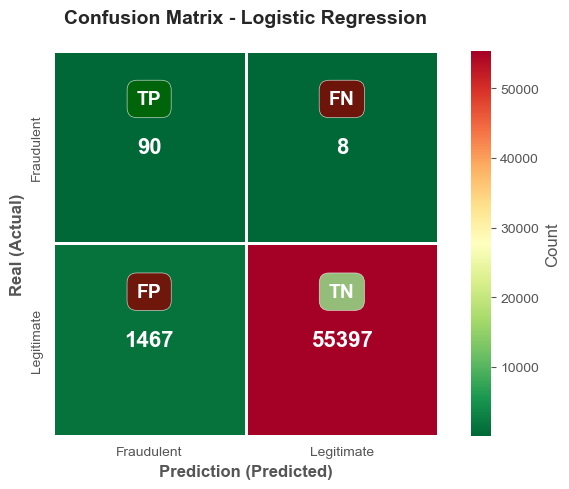

In [20]:
lr_baseline = LogisticRegression(random_state = 42, max_iter = 1000)
results_lr = evaluate_model(
    model=lr_baseline,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test_scaled,
    y_test = y_test,
    model_name = "Logistic Regression",
    show_confusion_matrix = True
)

### 12. Naive Bayes Classifier


Training Time: 0.2933 seconds


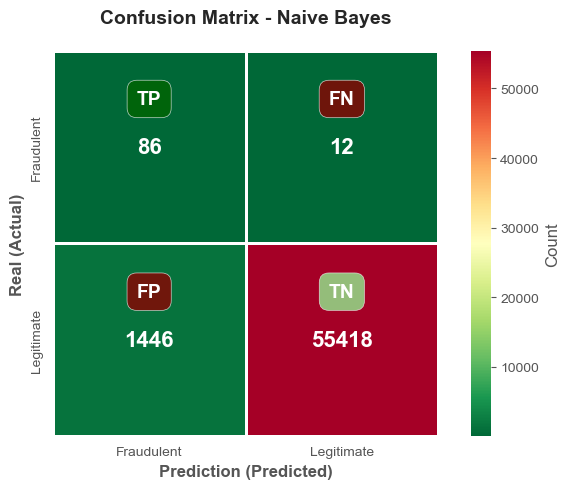

In [21]:
nb = GaussianNB()
results_nb = evaluate_model(
    model = nb,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test_scaled,
    y_test = y_test,
    model_name = "Naive Bayes",
    show_confusion_matrix = True
)

### 13. Random Forest 


Training Time: 2 minutes and 9.21 seconds


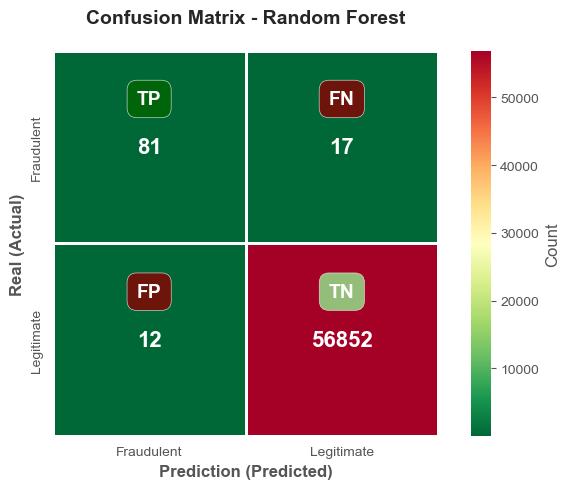

In [22]:
rf_default = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1)

results_rf_default = evaluate_model(
    model = rf_default,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test_scaled,
    y_test = y_test,
    model_name = "Random Forest",
    show_confusion_matrix = True
)

In [23]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_default.feature_importances_
}).sort_values('importance', ascending = False)

print("\nTop 10 Most Important Features:")
display(feature_importance.head(10))


Top 10 Most Important Features:


,feature,importance
14,V14,0.1903
10,V10,0.1115
4,V4,0.1114
12,V12,0.0957
17,V17,0.0829
3,V3,0.0639
11,V11,0.0493
16,V16,0.0451
2,V2,0.0385
9,V9,0.0271


### 14. Gradient Boosting (XGBoost)

In [24]:
xgboost = XGBClassifier(
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    max_depth = 6,
    learning_rate = 0.1,
    n_estimators = 200,
    random_state = 42,
    n_jobs = -1,
    eval_metric = 'logloss'
)



Training Time: 8.2637 seconds


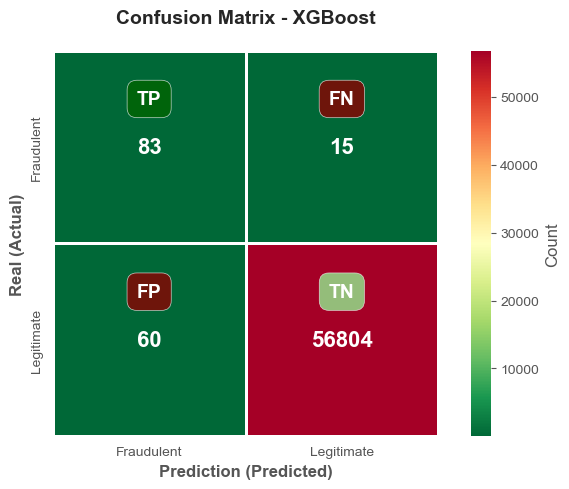

In [25]:
results_xgboost = evaluate_model(
    model = xgboost,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test_scaled,
    y_test = y_test,
    model_name = "XGBoost",
    show_confusion_matrix = True
)

### 15. Result Analysis

In [26]:
models = {
    "Logistic Regression": {
        "model": results_lr["model"],
        "y_pred": results_lr["predictions"],
        "probabilities": results_lr["probabilities"],
        "auc": results_lr["auc_score"],
        "confusion_matrix": results_lr["confusion_matrix"],
        "time": results_lr["training_time"]
    },
    "Naive Bayes": {
        "model": results_nb["model"],
        "y_pred": results_nb["predictions"],
        "probabilities": results_nb["probabilities"],
        "auc": results_nb["auc_score"],
        "confusion_matrix": results_nb["confusion_matrix"],
        "time": results_nb["training_time"]
    },
    "Random Forest": {
        "model": results_rf_default["model"],
        "y_pred": results_rf_default["predictions"],
        "probabilities": results_rf_default["probabilities"],
        "auc": results_rf_default["auc_score"],
        "confusion_matrix": results_rf_default["confusion_matrix"],
        "time": results_rf_default["training_time"]
    },
    "Gradient Boosting": {
        "model": results_xgboost["model"],
        "y_pred": results_xgboost["predictions"],
        "probabilities": results_xgboost["probabilities"],
        "auc": results_xgboost["auc_score"],
        "confusion_matrix": results_xgboost["confusion_matrix"],
        "time": results_xgboost["training_time"]
    },
}


In [27]:
# Calculate metrics for all models
results_df = []
for name, result in models.items():
    precision = precision_score(y_test, result["y_pred"])
    recall = recall_score(y_test, result["y_pred"])
    f1 = f1_score(y_test, result["y_pred"])

    results_df.append(
        {
            "Model": name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Training Time": result["time"],
            "ROC-AUC": result["auc"]
        }
    )

In [28]:
results_df = pd.DataFrame(results_df)
print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
display(results_df)


MODEL COMPARISON SUMMARY


,Model,Precision,Recall,F1-Score,Training Time,ROC-AUC
0,Logistic Regression,0.0578,0.9184,0.1088,1.4202,0.9708
1,Naive Bayes,0.0561,0.8776,0.1055,0.2933,0.9646
2,Random Forest,0.8710,0.8265,0.8482,129.2082,0.9685
3,Gradient Boosting,0.5804,0.8469,0.6888,8.2637,0.9790


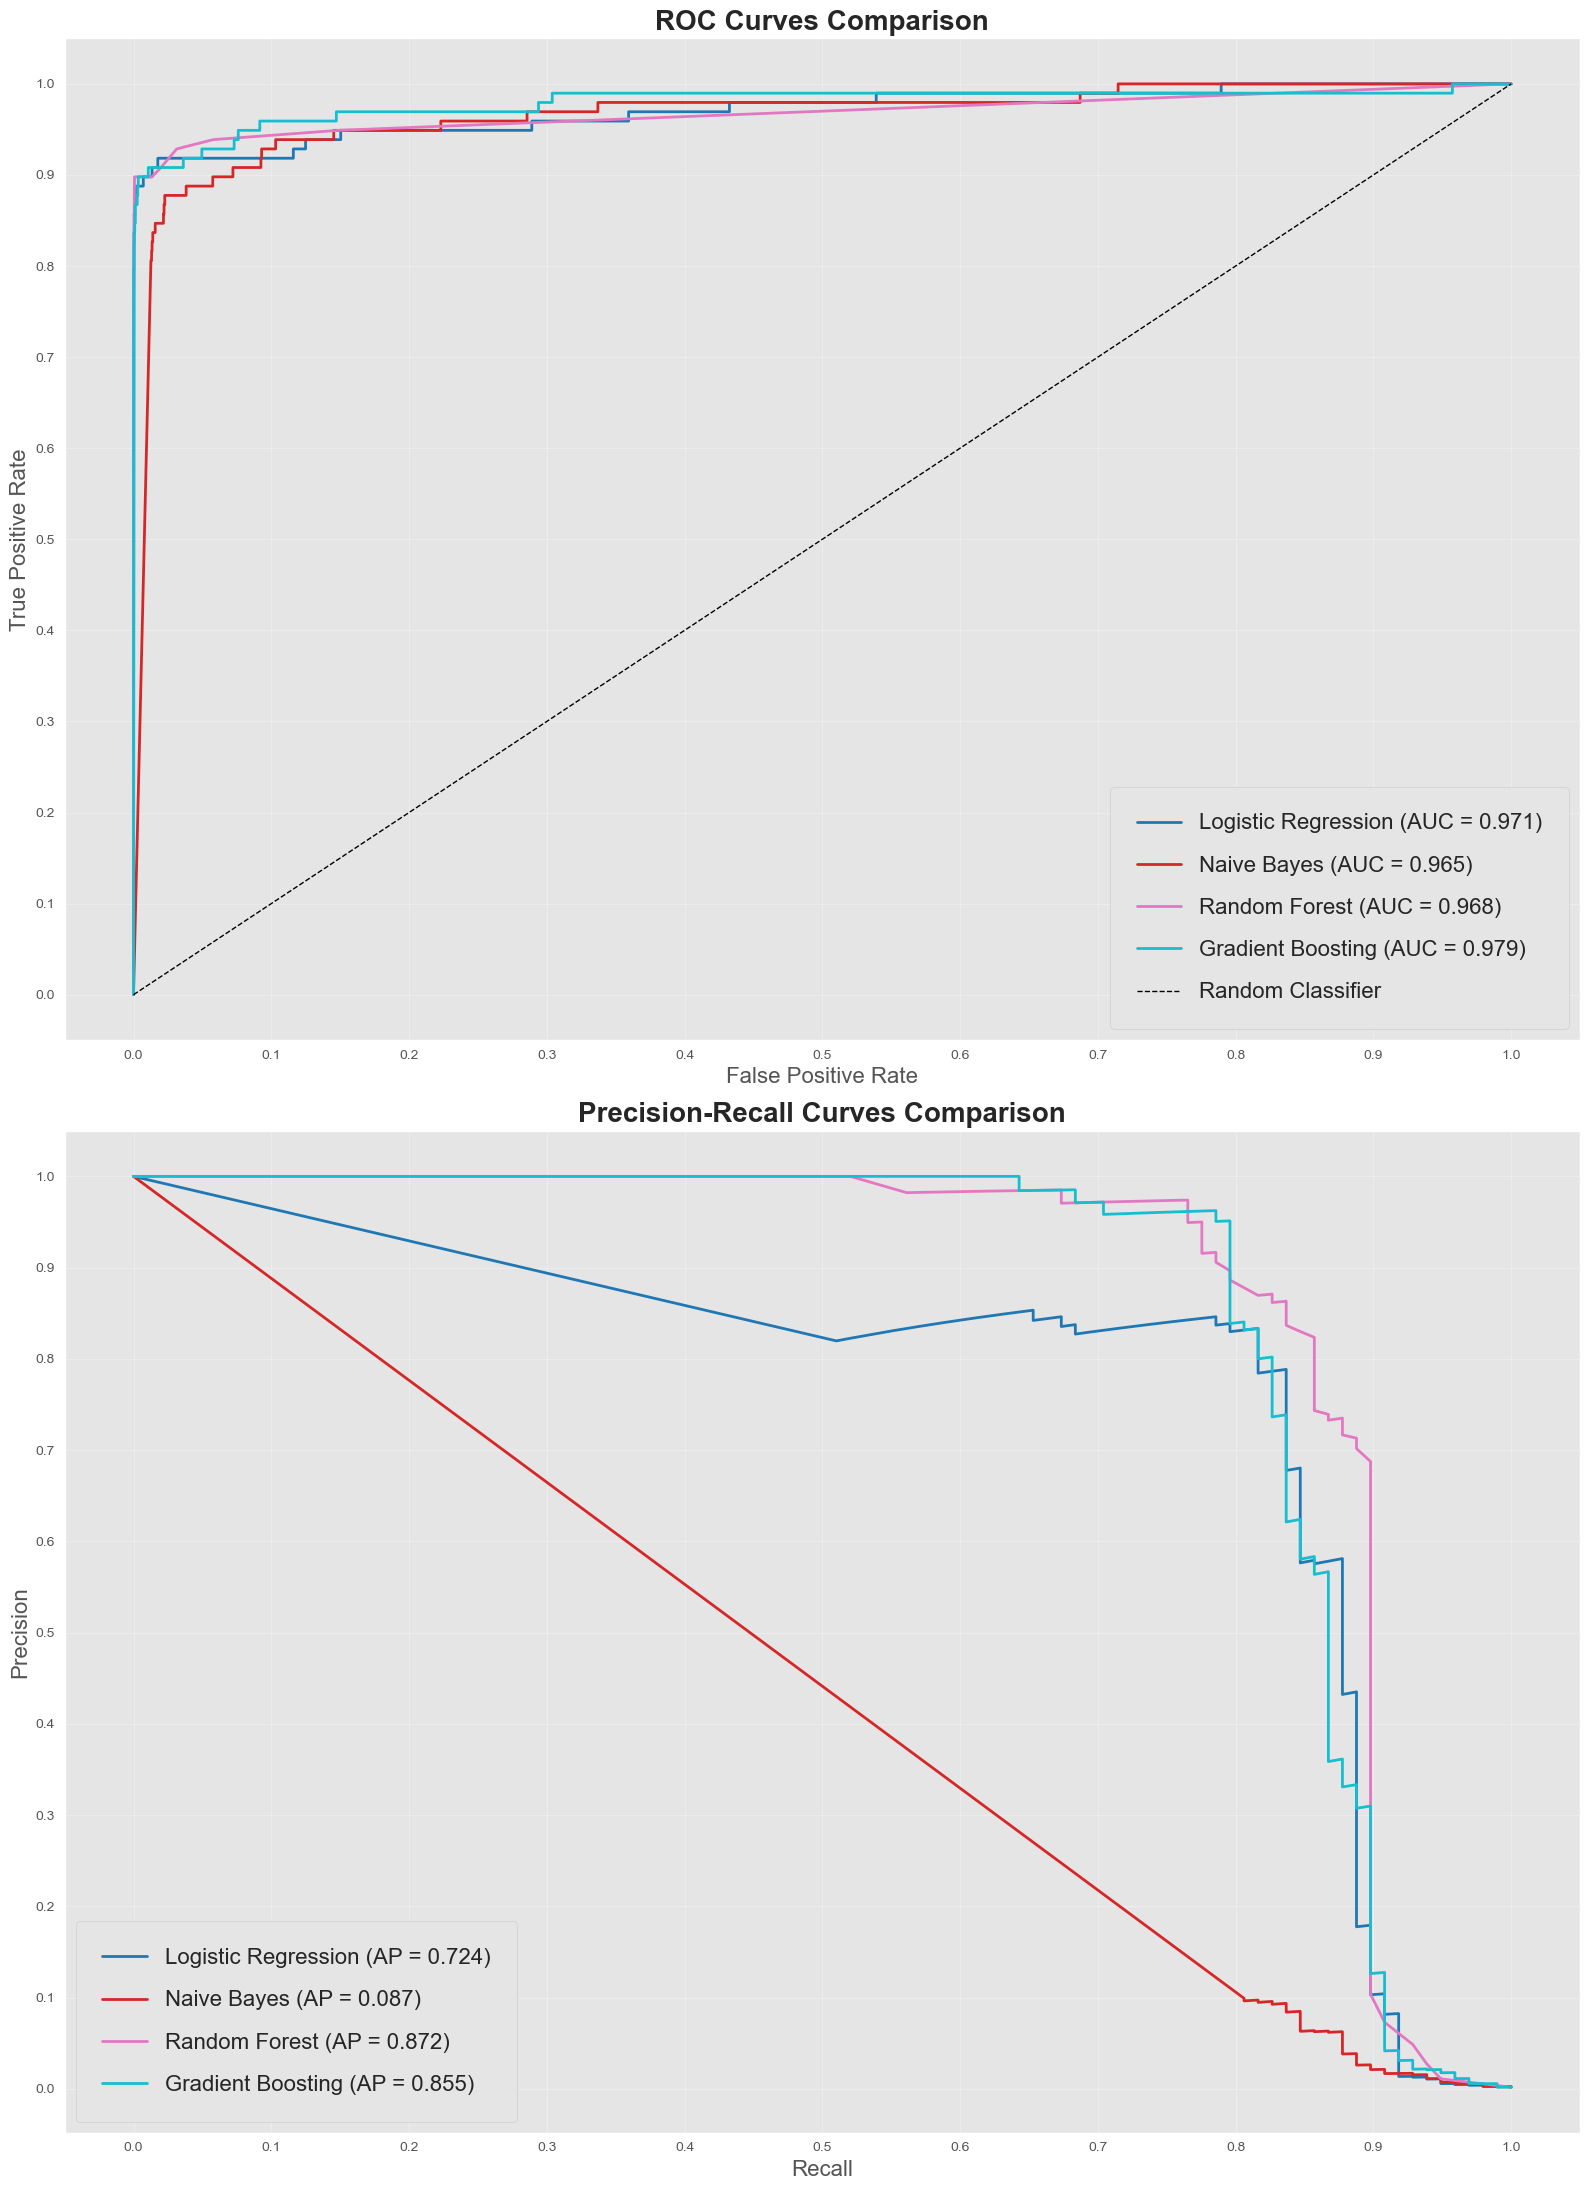

In [29]:
colors = cm.get_cmap('tab10', len(models))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 22))

# ROC Curves
for i, (name, result) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_test, result["probabilities"])
    ax1.plot(fpr, tpr, color = colors(i),
             label = f"{name} (AUC = {result['auc']:.3f})", linewidth = 2)

ax1.plot([0, 1], [0, 1], "k--", label = "Random Classifier", linewidth=1)
ax1.set_xlabel("False Positive Rate", fontsize = 16)
ax1.set_ylabel("True Positive Rate", fontsize = 16)
ax1.set_title("ROC Curves Comparison", fontsize = 20, fontweight = "bold")
ax1.legend(
    loc = "lower right",
    fontsize = 16,
    markerscale = 1.5,
    frameon = True,
    framealpha = 0.9,
    borderpad = 1.2,
    labelspacing = 1.0
)
ax1.grid(True, alpha = 0.3)

# Precision-Recall Curves
for i, (name, result) in enumerate(models.items()):
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, result['probabilities'])
    avg_precision = average_precision_score(y_test, result['probabilities'])
    ax2.plot(recall_curve, precision_curve, color = colors(i),
             label = f"{name} (AP = {avg_precision:.3f})", linewidth = 2)

# Tick adjustments
ax1.set_xticks(np.linspace(0, 1, 11))  
ax2.set_xticks(np.linspace(0, 1, 11))  
ax1.set_yticks(np.linspace(0, 1, 11))  
ax2.set_yticks(np.linspace(0, 1, 11)) 

ax2.set_xlabel('Recall', fontsize = 16)
ax2.set_ylabel('Precision', fontsize = 16)
ax2.set_title('Precision-Recall Curves Comparison', fontsize = 20, fontweight = 'bold')
ax2.legend(
    loc = 'lower left',
    fontsize = 16,
    markerscale = 1.5,
    frameon = True,
    framealpha = 0.9,
    borderpad = 1.2,
    labelspacing = 1.0
)
ax2.grid(True, alpha = 0.3)

plt.tight_layout()
plt.savefig('figures/roc_pr_curves_comparison.png', dpi = 300, bbox_inches = 'tight')
plt.show()


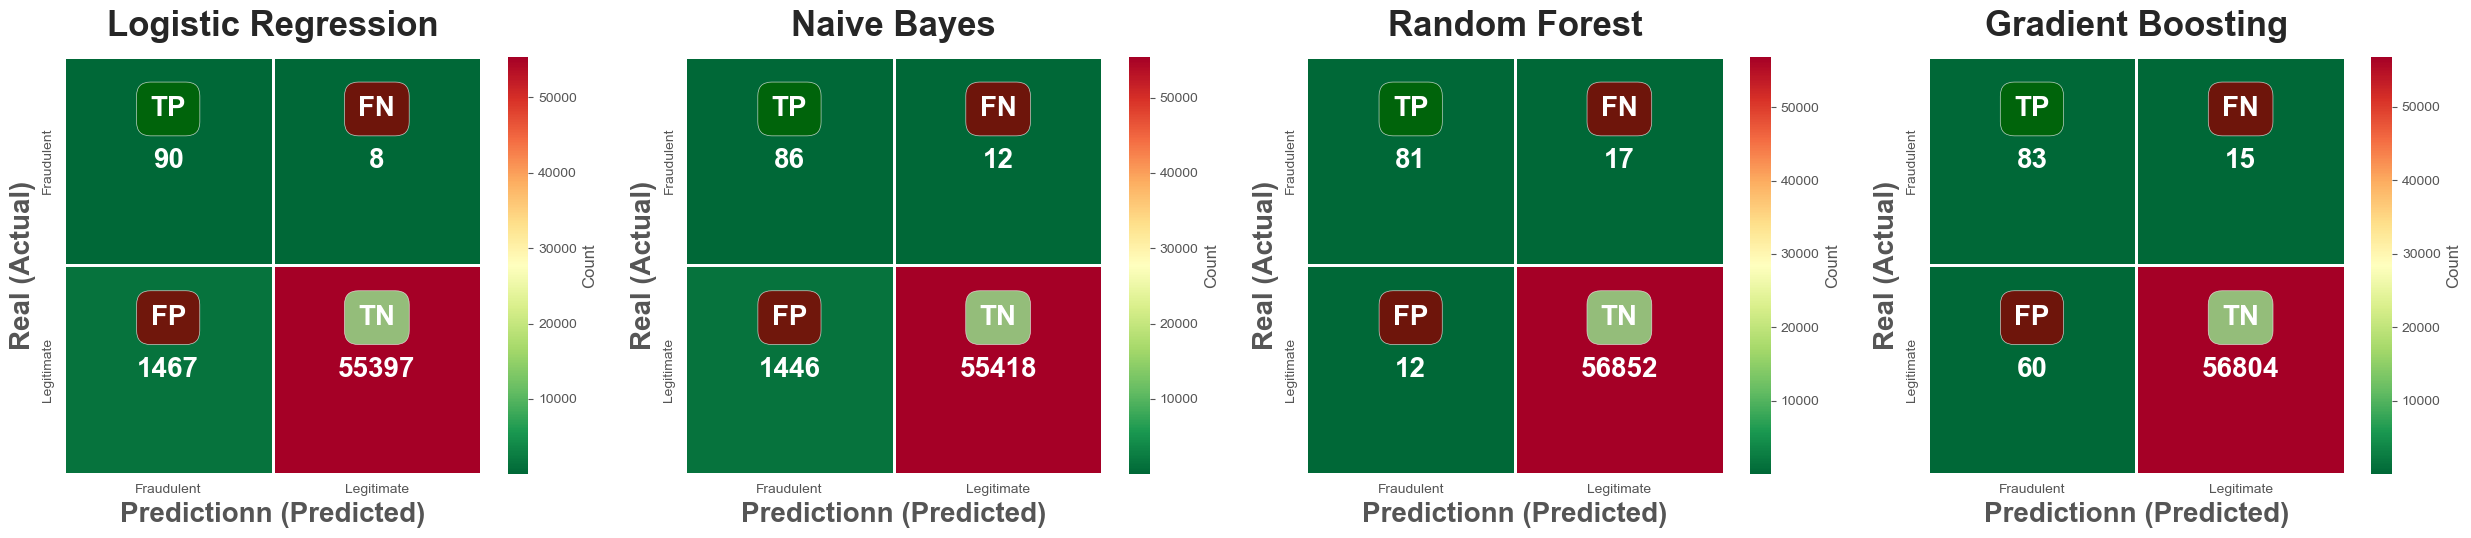

In [30]:
fig, axes = plt.subplots(1, 4, figsize = (25, 5))
axes = axes.ravel()

for idx, (name, result) in enumerate(models.items()):
    cm = result['confusion_matrix']
    
    # Create heatmap with enhanced styling
    sns.heatmap(
        cm,
        annot = True,
        fmt = 'd',
        cmap = 'RdYlGn_r',
        xticklabels = ['Fraudulent', 'Legitimate'],
        yticklabels = ['Fraudulent', 'Legitimate'],
        cbar_kws = {'label': 'Count'},
        linewidths = 2,
        linecolor = 'white',
        square = True,
        annot_kws = {'size': 20, 'weight': 'bold'},
        ax = axes[idx],
        
    )
    
    # Set title and labels
    axes[idx].set_title(f'{name}', fontweight = 'bold', fontsize = 25, pad = 15)
    axes[idx].set_ylabel('Real (Actual)', fontweight = 'bold', fontsize = 20)
    axes[idx].set_xlabel('Predictionn (Predicted)', fontweight = 'bold', fontsize = 20)
    
    axes[idx].text(
        0.5, 0.25, 'TP',
        ha = 'center', va = 'center',
        fontsize = 20, color = 'white', weight = 'bold',
        bbox=dict(boxstyle = 'round', pad = 0.5, facecolor = 'darkgreen', alpha = 0.8)
    )
    axes[idx].text(
        1.5, 0.25, 'FN',
        ha = 'center', va = 'center',
        fontsize = 20, color = 'white', weight = 'bold',
        bbox=dict(boxstyle = 'round', pad = 0.5, facecolor = 'darkred', alpha = 0.8)
    )
    axes[idx].text(
        0.5, 1.25, 'FP',
        ha = 'center', va = 'center',
        fontsize = 20, color = 'white', weight = 'bold',
        bbox=dict(boxstyle = 'round', pad = 0.5 , facecolor = 'darkred', alpha = 0.8)
    )
    axes[idx].text(
        1.5, 1.25, 'TN',
        ha = 'center', va = 'center',
        fontsize = 20, color='white', weight='bold',
        bbox = dict(boxstyle = 'round', pad = 0.5, facecolor = 'lightgreen', alpha = 0.8)
    )

for idx in range(len(models), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('figures/confusion_matrices.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [31]:
fbeta_results = []
beta_values = [0.5, 1.0, 2.0, 3.0]  

for name, result in models.items():
    row = {"Model": name}
    for beta in beta_values:
        fb_score = fbeta_score(y_test, result["y_pred"], beta = beta)
        row[f"F{beta}-Score"] = fb_score
    fbeta_results.append(row)

fbeta_df = pd.DataFrame(fbeta_results)

print("\n" + "=" * 80)
print("F-BETA SCORE COMPARISON")
print("=" * 80)
print("\nInterpretation:")
print("  - F0.5: Favors precision (minimizes false positives)")
print("  - F1.0: Standard balance between precision and recall")
print("  - F2.0: Favors recall 2x more (common in fraud detection)")
print("  - F3.0: Favors recall 3x more (high-risk contexts)\n")
display(fbeta_df)


F-BETA SCORE COMPARISON

Interpretation:
  - F0.5: Favors precision (minimizes false positives)
  - F1.0: Standard balance between precision and recall
  - F2.0: Favors recall 2x more (common in fraud detection)
  - F3.0: Favors recall 3x more (high-risk contexts)



,Model,F0.5-Score,F1.0-Score,F2.0-Score,F3.0-Score
0,Logistic Regression,0.0711,0.1088,0.2309,0.3690
1,Naive Bayes,0.0691,0.1055,0.2235,0.3563
2,Random Forest,0.8617,0.8482,0.8351,0.8308
3,Gradient Boosting,0.6194,0.6888,0.7757,0.8098


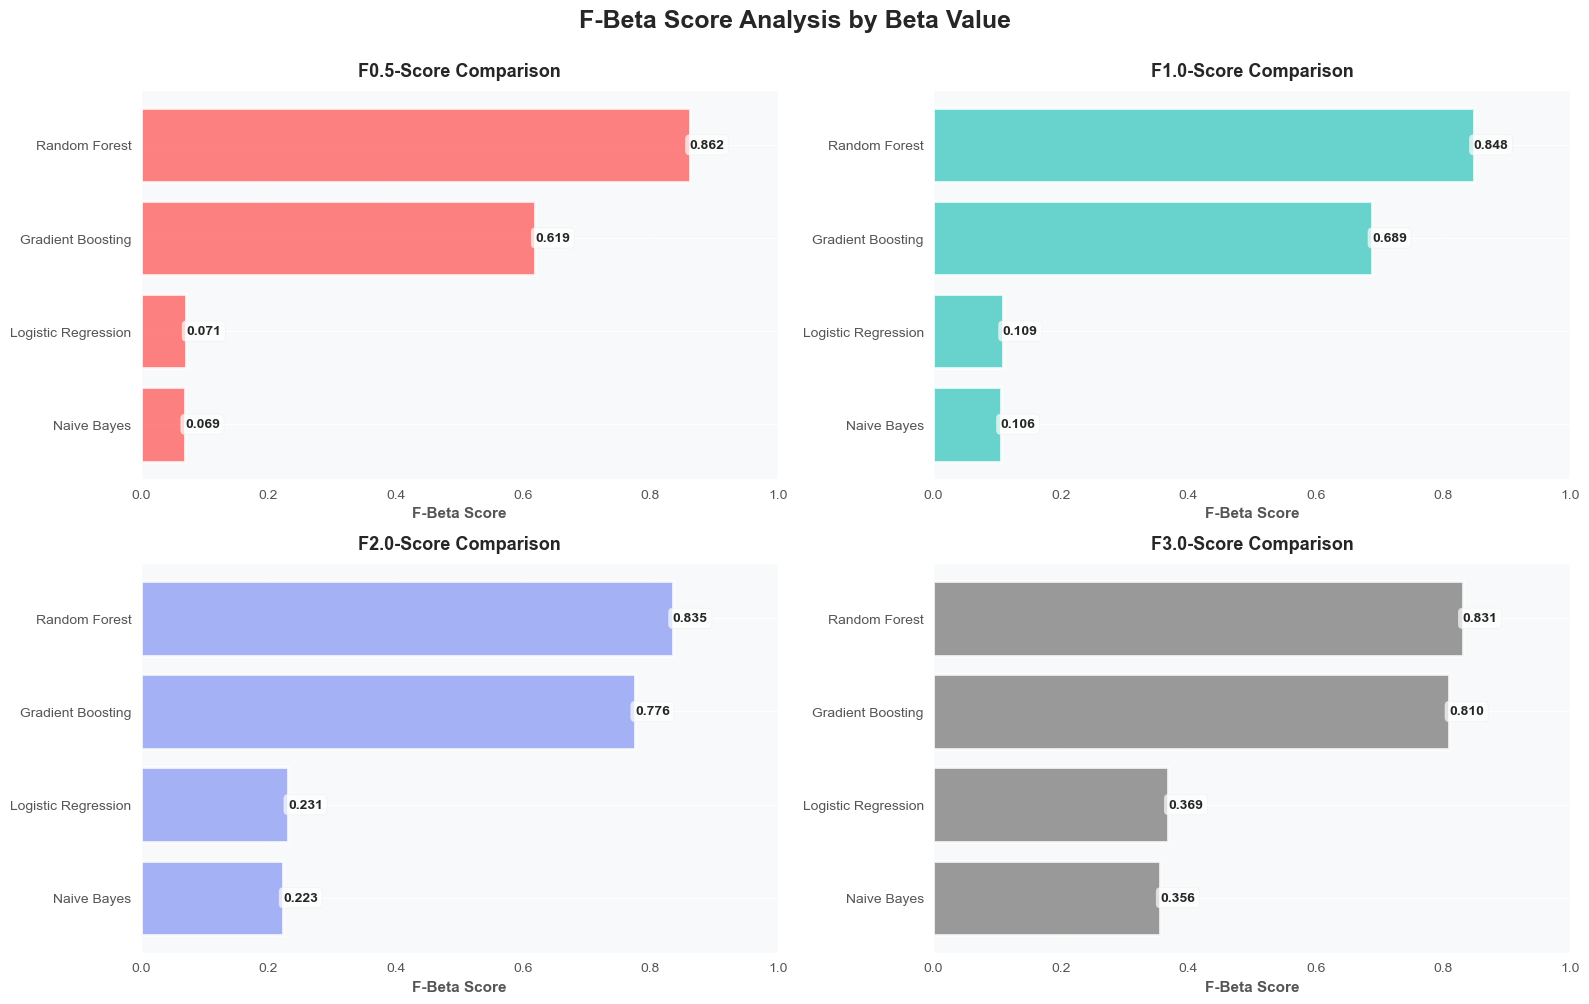

In [32]:
fig, axes = plt.subplots(2, 2, figsize = (16, 10))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#95A5F3', '#888888']

for idx, beta in enumerate(beta_values):
    ax = axes[idx]
    sorted_df = fbeta_df.sort_values(by = f'F{beta}-Score', ascending = True)
    
    bars = ax.barh(sorted_df['Model'], sorted_df[f'F{beta}-Score'], 
                   color = colors[idx], alpha = 0.85, edgecolor = 'white', linewidth = 2)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2.,
               f'{width:.3f}',
               ha ='left', va ='center', fontsize = 10, fontweight = 'bold',
               bbox = dict(boxstyle = 'round', pad = 0.3, facecolor = 'white', alpha = 0.7))
    
    ax.set_xlabel('F-Beta Score', fontsize = 11, fontweight = 'bold')
    ax.set_title(f'F{beta}-Score Comparison', fontsize = 13, fontweight = 'bold', pad = 10)
    ax.set_xlim(0, 1.0)
    ax.grid(True, alpha = 0.2, axis = 'x', linestyle = '--')
    ax.set_facecolor('#f8f9fa')

plt.suptitle('F-Beta Score Analysis by Beta Value', fontsize = 18, fontweight = 'bold', y = 1.00)
plt.tight_layout()
plt.savefig("figures/fbeta_small_multiples.png", dpi = 300, bbox_inches = "tight", facecolor = 'white')
plt.show()

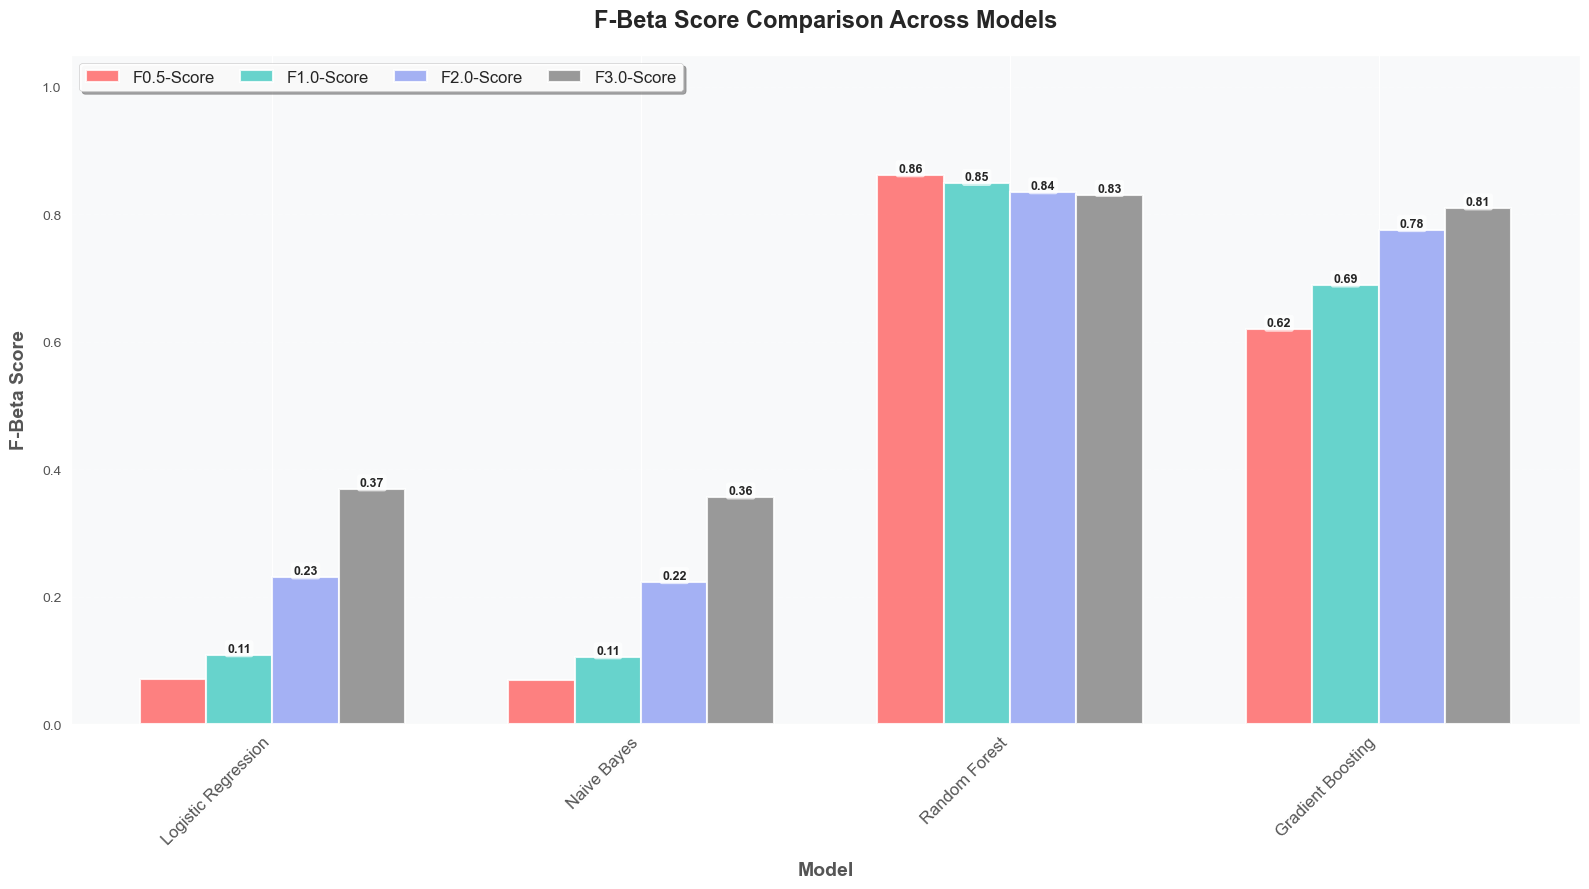

In [33]:
fig, ax = plt.subplots(figsize = (16, 9))

x = np.arange(len(fbeta_df))
width = 0.18
colors = ['#FF6B6B', '#4ECDC4', '#95A5F3', '#888888']

# Create bars with better styling
bars_list = []
for i, beta in enumerate(beta_values):
    offset = width * (i - 1.5)
    bars = ax.bar(
        x + offset, 
        fbeta_df[f"F{beta}-Score"], 
        width, 
        label = f"F{beta}-Score",
        alpha = 0.85,
        color = colors[i],
        edgecolor = 'white',
        linewidth = 1.5
    )
    bars_list.append(bars)
    
    # Add value labels on top of bars (only if visible)
    for bar in bars:
        height = bar.get_height()
        if height > 0.08:  # Only show label if bar is reasonably visible
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}',
                   ha = 'center', va = 'bottom', fontsize = 9, fontweight = 'bold',
                   bbox = dict(boxstyle = 'round', pad = 0.2, facecolor = 'white', 
                            alpha = 0.7, edgecolor = 'none'))

# Styling
ax.set_xlabel("Model", fontsize = 14, fontweight = 'bold', labelpad = 10)
ax.set_ylabel("F-Beta Score", fontsize = 14, fontweight = 'bold', labelpad = 10)
ax.set_title("F-Beta Score Comparison Across Models", 
             fontsize = 17, fontweight = 'bold', pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(fbeta_df["Model"], rotation = 45, ha = "right", fontsize = 12)
ax.set_ylim(0, 1.05)

# Enhanced legend
legend = ax.legend(fontsize = 12, frameon = True, shadow = True, 
                   loc = 'upper left', ncol = 4, columnspacing = 1.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

# Grid and background
ax.grid(True, alpha = 0.25, axis = "y", linestyle = '--', linewidth = 1)
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig("figures/fbeta_grouped_comparison.png", dpi = 300, bbox_inches = "tight", facecolor = 'white')
plt.show()

In [34]:
# PLOTTING FUNCTIONS

def plot_continuous_fbeta(
    model_name,
    y_true,
    y_pred,
    beta_range=(0.1, 5.0),
    num_points=100,
    save_fig=True,
    filename=None,
    show_metrics=True,
):

    # Generate beta values
    beta_values = np.linspace(beta_range[0], beta_range[1], num_points)

    # Calculate F-beta scores for each beta
    fbeta_scores = []
    for beta in beta_values:
        score = fbeta_score(y_true, y_pred, beta = beta, zero_division = 0)
        fbeta_scores.append(score)

    # Calculate precision and recall (constant for a given model)
    precision = precision_score(y_true, y_pred, zero_division = 0)
    recall = recall_score(y_true, y_pred, zero_division = 0)

    # Create the plot
    fig, ax = plt.subplots(figsize = (14, 8))

    # Plot the continuous curve
    ax.plot(
        beta_values,
        fbeta_scores,
        linewidth=3,
        color="#2E86AB",
        label=f"{model_name}",
        alpha=0.9,
    )

    # Fill area under curve
    ax.fill_between(beta_values, fbeta_scores, alpha=0.2, color="#2E86AB")

    # Mark special beta values
    special_betas = [0.5, 1.0, 2.0, 3.0]
    special_scores = [
        fbeta_score(y_true, y_pred, beta=b, zero_division=0) for b in special_betas
    ]

    ax.scatter(
        special_betas,
        special_scores,
        s=150,
        c="red",
        zorder=5,
        edgecolors="white",
        linewidth=2,
        label="Standard β values",
    )

    # Add value labels for special betas
    for beta, score in zip(special_betas, special_scores):
        ax.annotate(
            f"F{beta}: {score:.3f}",
            xy=(beta, score),
            xytext=(0, 15),
            textcoords="offset points",
            ha="center",
            fontsize=10,
            fontweight="bold",
            bbox=dict(
                boxstyle="round,pad=0.5",
                facecolor="yellow",
                alpha=0.7,
                edgecolor="none",
            ),
        )

    # Add horizontal lines for precision and recall
    if show_metrics:
        ax.axhline(
            y=precision,
            color="#27ae60",
            linestyle="--",
            linewidth=2,
            alpha=0.7,
            label=f"Precision = {precision:.3f}",
        )
        ax.axhline(
            y=recall,
            color="#e74c3c",
            linestyle="--",
            linewidth=2,
            alpha=0.7,
            label=f"Recall = {recall:.3f}",
        )

        # Add shaded regions to show convergence
        ax.axvspan(
            beta_range[0],
            0.2,
            alpha=0.1,
            color="green",
            label="Precision-dominant region",
        )
        ax.axvspan(
            4.0, beta_range[1], alpha=0.1, color="red", label="Recall-dominant region"
        )

    # Calculate and display stability metrics
    beta_std = np.std(fbeta_scores)
    beta_range_val = max(fbeta_scores) - min(fbeta_scores)

    stability_text = (
        f"Stability Metrics:\n"
        f"Range: {beta_range_val:.3f}\n"
        f"Std Dev: {beta_std:.3f}\n"
        f"Precision: {precision:.3f}\n"
        f"Recall: {recall:.3f}"
    )

    props = dict(boxstyle="round", facecolor="wheat", alpha=0.8)
    ax.text(
        0.98,
        0.02,
        stability_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment="bottom",
        horizontalalignment="right",
        bbox=props,
        family="monospace",
    )

    # Styling
    ax.set_xlabel("Beta Value (β)", fontsize=13, fontweight="bold")
    ax.set_ylabel("F-Beta Score", fontsize=13, fontweight="bold")
    ax.set_title(
        f"Continuous F-Beta Score Analysis: {model_name}",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )
    ax.set_xlim(beta_range[0], beta_range[1])
    ax.set_ylim(-0.05, 1.1)  # Changed from (0, 1.05) to (-0.05, 1.1)
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.legend(fontsize=10, frameon=True, shadow=True, loc="best")
    ax.set_facecolor("#f8f9fa")

    # Add interpretation annotations
    ax.text(
        0.3,
        0.95,
        "β → 0: Favors Precision",
        transform=ax.transAxes,
        fontsize=10,
        style="italic",
        alpha=0.7,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.3),
    )

    ax.text(
        0.7,
        0.95,
        "β → ∞: Favors Recall",
        transform=ax.transAxes,
        fontsize=10,
        style="italic",
        alpha=0.7,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.3),
    )

    plt.tight_layout()

    # Save if requested
    if save_fig:
        if filename is None:
            filename = f"fbeta_continuous_{model_name.replace(' ', '_').lower()}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight", facecolor="white")
        print(f"Figure saved as: {filename}")

    plt.show()

    # Return results
    beta_scores = {
        "beta_values": beta_values,
        "fbeta_scores": fbeta_scores,
        "precision": precision,
        "recall": recall,
        "stability_range": beta_range_val,
        "stability_std": beta_std,
    }

    return fig, ax, beta_scores


In [35]:
def plot_continuous_fbeta_comparison(
    models_dict,
    beta_range=(0.1, 5.0),
    num_points=100,
    save_fig=True,
    filename="figures/fbeta_comparison.png",
):

    # Generate beta values
    beta_values = np.linspace(beta_range[0], beta_range[1], num_points)

    # Color palette for different models
    colors = [
        "#2E86AB",
        "#A23B72",
        "#F18F01",
        "#C73E1D",
        "#6A994E",
        "#BC4B51",
        "#8B5A3C",
        "#5E548E",
    ]

    fig, ax = plt.subplots(figsize=(16, 10))

    all_results = {}

    for idx, (model_name, data) in enumerate(models_dict.items()):
        y_true = data["y_true"]
        y_pred = data["y_pred"]

        # Calculate F-beta scores
        fbeta_scores = [
            fbeta_score(y_true, y_pred, beta=b, zero_division=0) for b in beta_values
        ]

        # Calculate metrics
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)

        # Determine line style based on stability
        beta_range_val = max(fbeta_scores) - min(fbeta_scores)
        linestyle = "-" if abs(beta_range_val) < 0.15 else "--"
        linewidth = 2.5 if abs(beta_range_val) < 0.15 else 2
        alpha = 0.9 if abs(beta_range_val) < 0.15 else 0.6

        # Plot the curve
        ax.plot(
            beta_values,
            fbeta_scores,
            linewidth=linewidth,
            color=colors[idx % len(colors)],
            label=model_name,
            linestyle=linestyle,
            alpha=alpha,
        )

        # Store results
        all_results[model_name] = {
            "beta_values": beta_values,
            "fbeta_scores": fbeta_scores,
            "precision": precision,
            "recall": recall,
            "stability_range": beta_range_val,
            "stability_std": np.std(fbeta_scores),
        }

    # Mark special beta values
    for beta in [0.5, 1.0, 2.0, 3.0]:
        ax.axvline(x=beta, color="gray", linestyle=":", alpha=0.3, linewidth=1)
        ax.text(
            beta,
            1.02,
            f"β={beta}",
            ha="center",
            fontsize=9,
            fontweight="bold",
            color="gray",
        )

    # Styling
    ax.set_xlabel("Beta Value (β)", fontsize=14, fontweight="bold")
    ax.set_ylabel("F-Beta Score", fontsize=14, fontweight="bold")
    ax.set_title(
        "Continuous F-Beta Score Comparison Across Models",
        fontsize=17,
        fontweight="bold",
        pad=20,
    )
    ax.set_xlim(beta_range[0], beta_range[1])
    ax.set_ylim(-0.05, 1.1)  # Changed from (0, 1.05) to (-0.05, 1.1)
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.legend(fontsize=11, frameon=True, shadow=True, loc="best", ncol=2)
    ax.set_facecolor("#f8f9fa")

    # Add interpretation
    interpretation = (
        "Solid lines: Stable models (|Range| < 0.15)\n"
        "Dashed lines: Unstable models (|Range| ≥ 0.15)"
    )
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.7)
    ax.text(
        0.02,
        0.98,
        interpretation,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=props,
    )

    plt.tight_layout()

    if save_fig:
        plt.savefig(filename, dpi=300, bbox_inches="tight", facecolor="white")
        print(f"Figure saved as: {filename}")

    plt.show()

    return fig, ax, all_results

In [36]:
def plot_continuous_fbeta_grid(
    models_dict,
    beta_range=(0.1, 5.0),
    num_points=100,
    save_fig=True,
    filename="figures/fbeta_grid.png",
):
    n_models = len(models_dict)
    n_cols = 2
    n_rows = int(np.ceil(n_models / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]

    beta_values = np.linspace(beta_range[0], beta_range[1], num_points)
    colors = [
        "#2E86AB",
        "#A23B72",
        "#F18F01",
        "#C73E1D",
        "#6A994E",
        "#BC4B51",
        "#8B5A3C",
        "#5E548E",
    ]

    for idx, (model_name, data) in enumerate(models_dict.items()):
        ax = axes[idx]
        y_true = data["y_true"]
        y_pred = data["y_pred"]

        # Calculate scores
        fbeta_scores = [
            fbeta_score(y_true, y_pred, beta=b, zero_division=0) for b in beta_values
        ]
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)

        # Plot
        ax.plot(
            beta_values,
            fbeta_scores,
            linewidth=3,
            color=colors[idx % len(colors)],
            alpha=0.9,
        )
        ax.fill_between(
            beta_values, fbeta_scores, alpha=0.2, color=colors[idx % len(colors)]
        )

        # Add precision and recall lines
        ax.axhline(
            y=precision,
            color="#27ae60",
            linestyle="--",
            linewidth=2,
            alpha=0.6,
            label=f"P={precision:.2f}",
        )
        ax.axhline(
            y=recall,
            color="#e74c3c",
            linestyle="--",
            linewidth=2,
            alpha=0.6,
            label=f"R={recall:.2f}",
        )

        # Mark special betas
        special_betas = [0.5, 1.0, 2.0, 3.0]
        special_scores = [
            fbeta_score(y_true, y_pred, beta=b, zero_division=0) for b in special_betas
        ]
        ax.scatter(
            special_betas,
            special_scores,
            s=100,
            c="red",
            zorder=5,
            edgecolors="white",
            linewidth=2,
        )

        # Styling
        ax.set_title(model_name, fontsize=13, fontweight="bold", pad=10)
        ax.set_xlabel("Beta (β)", fontsize=11, fontweight="bold")
        ax.set_ylabel("F-Beta Score", fontsize=11, fontweight="bold")
        ax.set_xlim(beta_range[0], beta_range[1])

        # Dynamic y-axis to make curves less flat
        min_score = min(min(fbeta_scores), precision, recall)
        max_score = max(max(fbeta_scores), precision, recall)
        y_margin = (max_score - min_score) * 0.15  # 15% margin
        ax.set_ylim(max(0, min_score - y_margin), min(1.0, max_score + y_margin))

        ax.grid(True, alpha=0.3, linestyle="--")
        ax.legend(fontsize=9, loc="best", frameon=True)
        ax.set_facecolor("#f8f9fa")

        # Add stability info
        beta_range_val = max(fbeta_scores) - min(fbeta_scores)
        stability = "Stable" if abs(beta_range_val) < 0.15 else "Unstable"
        color_box = "lightgreen" if abs(beta_range_val) < 0.15 else "#ffcccb"

        ax.text(
            0.95,
            0.05,
            f"{stability}\nRange: {beta_range_val:.3f}",
            transform=ax.transAxes,
            fontsize=9,
            va="bottom",
            ha="right",
            bbox=dict(boxstyle="round,pad=0.5", facecolor=color_box, alpha=0.7),
        )

    # Hide extra subplots
    for idx in range(n_models, len(axes)):
        axes[idx].axis("off")

    plt.suptitle(
        "Continuous F-Beta Analysis: All Models",
        fontsize=18,
        fontweight="bold",
        y=0.995,
    )
    plt.tight_layout()

    if save_fig:
        plt.savefig(filename, dpi=300, bbox_inches="tight", facecolor="white")
        print(f"Figure saved as: {filename}")

    plt.show()

    return fig, axes

Figure saved as: figures/fbeta_grid.png


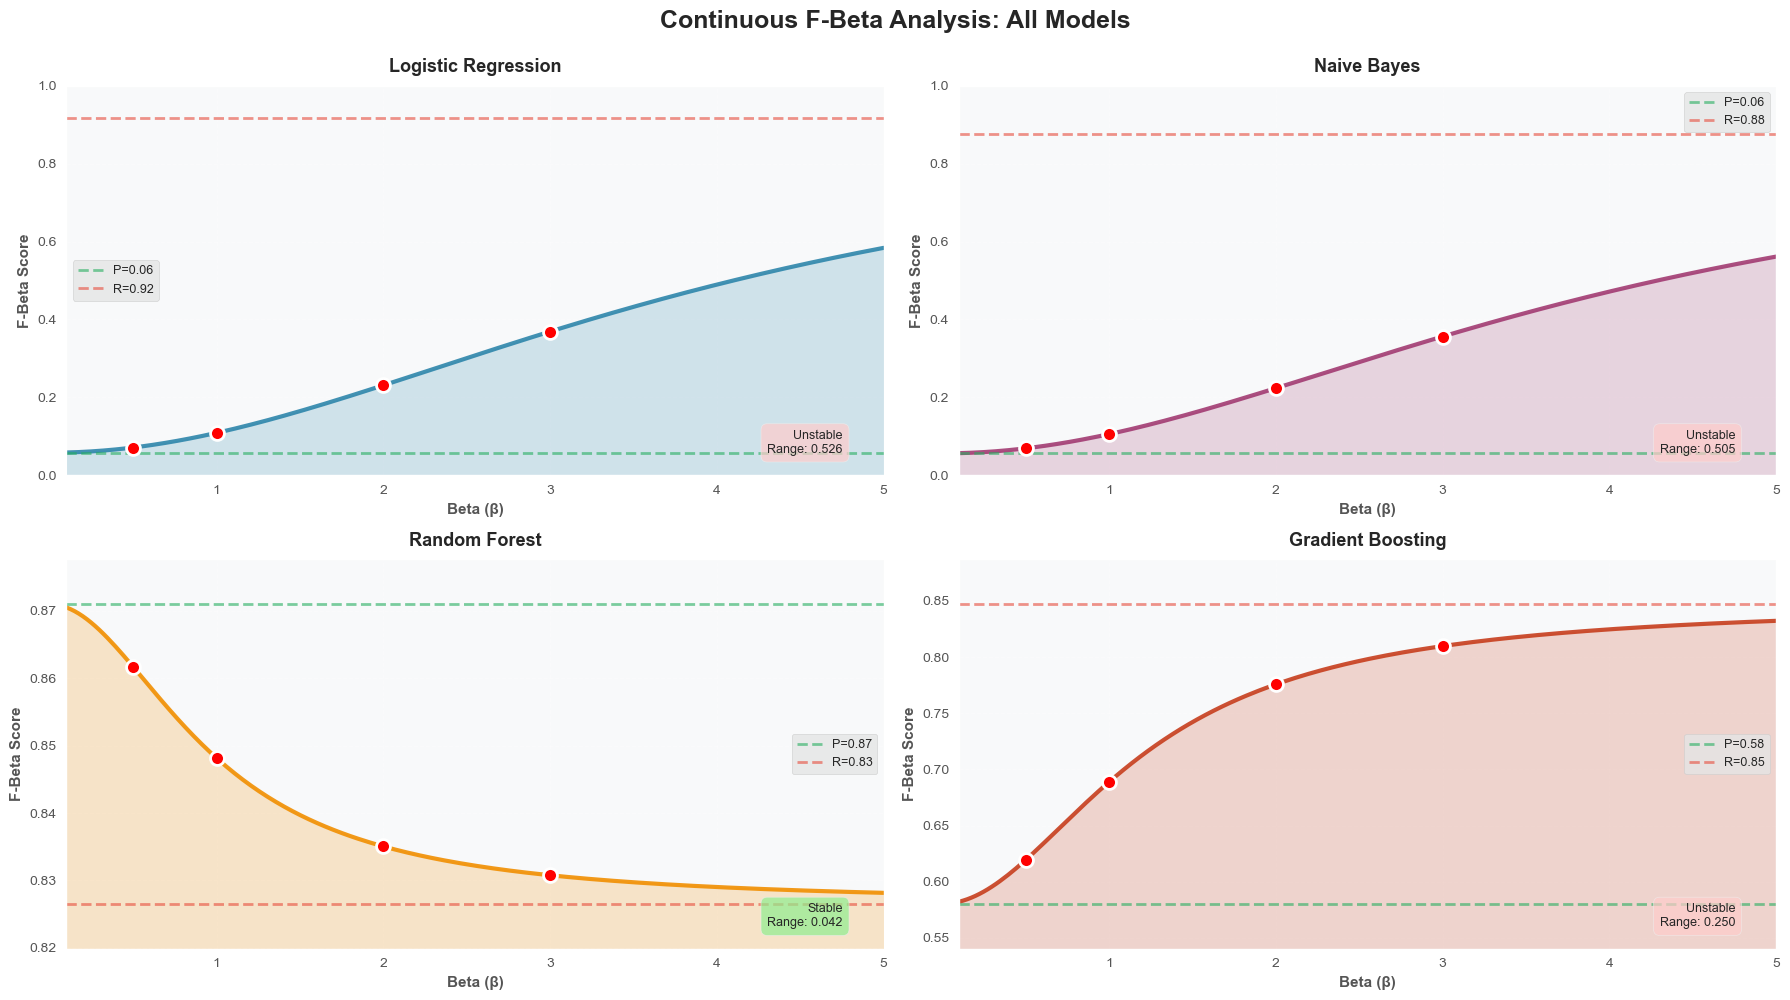

Figure saved as: figures/fbeta_comparison.png


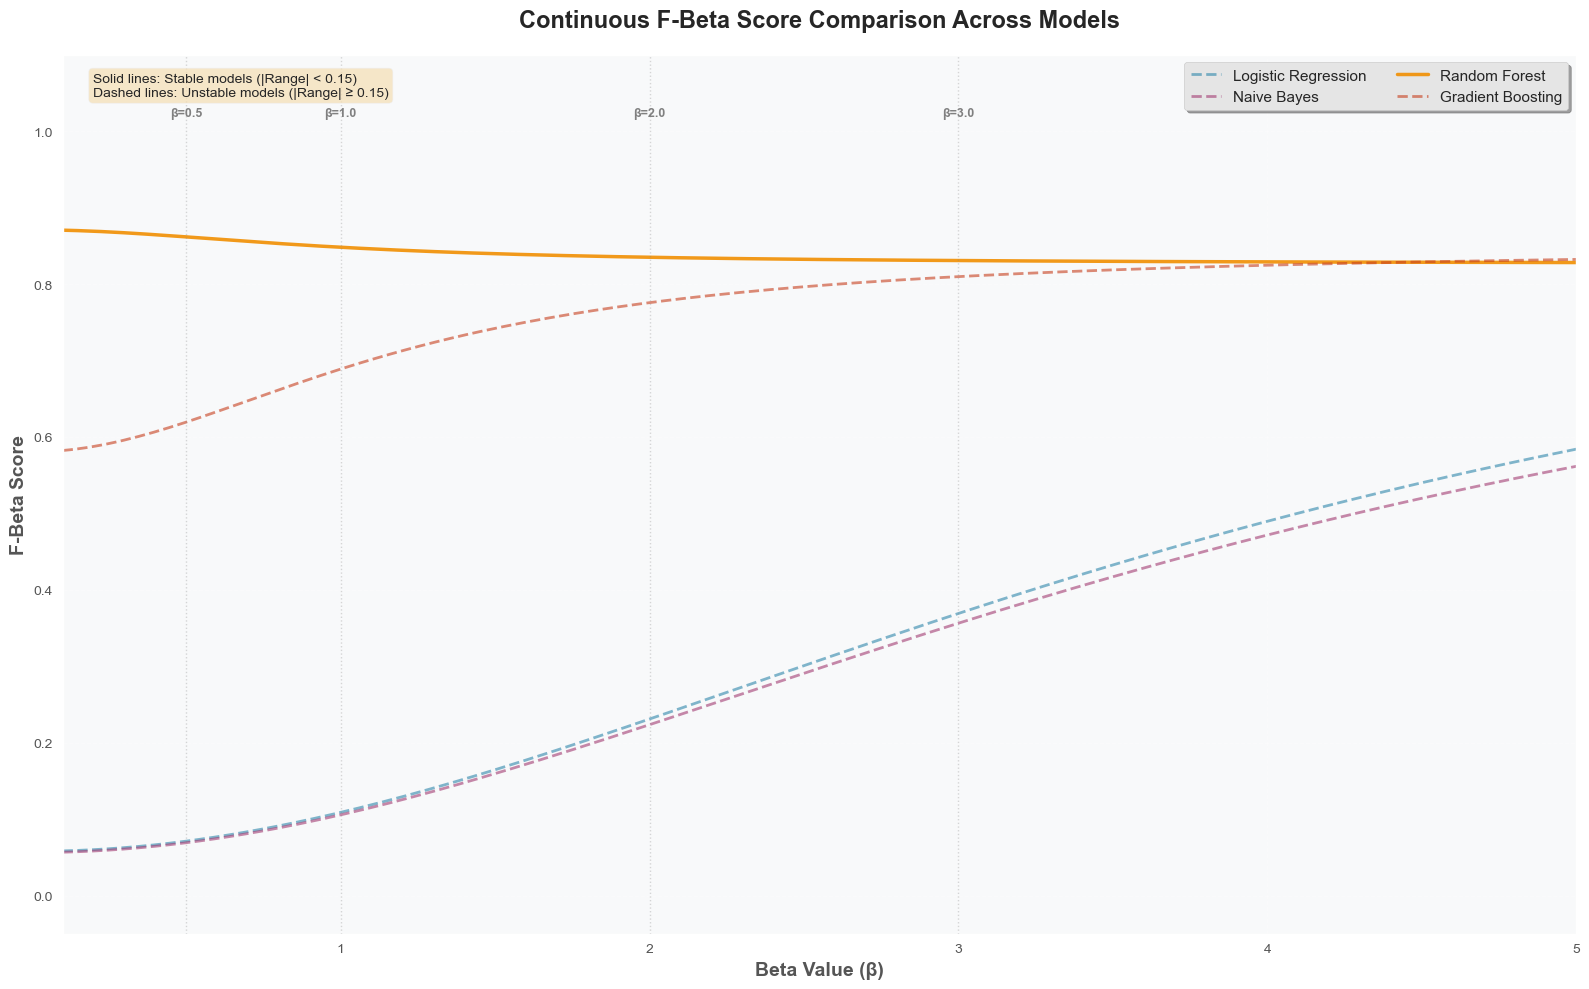

In [37]:
models_for_comparison = {}
for name, result in models.items():
    models_for_comparison[name] = {
        'y_true': y_test,
        'y_pred': result['y_pred']
    }


fig, axes = plot_continuous_fbeta_grid(
    models_dict=models_for_comparison,
    beta_range=(0.1, 5.0),
    num_points=200,
    save_fig=True,
)

fig, ax, all_results = plot_continuous_fbeta_comparison(
    models_dict=models_for_comparison,
    beta_range=(0.1, 5.0),
    num_points=200,
    save_fig=True,
)

### 16. Best Model Selection

In [38]:
# MODEL PERFORMANCE COMPARISON VISUALIZATION

# Rank models by ROC-AUC
results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print("\n" + "=" * 80)
print("MODEL LEADERBOARD (Ranked by ROC-AUC)")
print("=" * 80)
display(results_df.style.background_gradient(cmap="Blues", subset=["Precision", "Recall", "F1-Score", "ROC-AUC"]))


# BEST MODEL SELECTION
best_model = results_df.loc[results_df["ROC-AUC"].idxmax()]
print("\nBest Model Based on ROC-AUC:")
print(f"Model: {best_model['Model']}")
print(f"ROC-AUC: {best_model['ROC-AUC']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")
print(f"Training Time: {best_model['Training Time']:.2f} seconds")



MODEL LEADERBOARD (Ranked by ROC-AUC)


,Model,Precision,Recall,F1-Score,Training Time,ROC-AUC
0,Gradient Boosting,0.580420,0.846939,0.688797,8.263695,0.979041
1,Logistic Regression,0.057803,0.918367,0.108761,1.420176,0.970843
2,Random Forest,0.870968,0.826531,0.848168,129.208231,0.968451
3,Naive Bayes,0.056136,0.877551,0.105521,0.293312,0.964582



Best Model Based on ROC-AUC:
Model: Gradient Boosting
ROC-AUC: 0.9790
Precision: 0.5804
Recall: 0.8469
F1-Score: 0.6888
Training Time: 8.26 seconds


In [39]:
# for n, r in models.items():
#     if best_model['Model'] == n:
#         print(f"Best Model:{n}")
#         filename = f"best_model_{n.replace(' ','_').lower()}.pkl"
#         # joblib.dump(r, filename)
#         print(f"{n} Model Saved Successfully to {filename}")
#         print(r)

### 16. Save Best Model

In [40]:
import joblib
best_entry = models[best_model['Model']]

joblib.dump(best_entry, f"best_model_{best_model['Model'].replace(' ', '_').lower()}.pkl")

print(f"{best_model['Model']} Model saved successfully.")

Gradient Boosting Model saved successfully.


### 17. Test the model on samples

In [41]:
# ---------- Load the trained model ----------
model = joblib.load('best_model_gradient_boosting.pkl')
model = model['model']
# ---------- Create a sample input ----------
# Replace these 29 values with realistic ones from your dataset
my_input = [[-2.021, 0.697, 2.963, -4.317, 5.017, 0.886, -1.942, -1.348, 0.359, -2.817,
     -5.462, 6.578, -8.965, 0.487, -10.936, -1.497, -2.028, -2.178, 0.781,
     -1.592, 0.752, 0.514, -0.783, -1.058, -1.099, 3.075, 1.077, 1.812, 1.529, 0.55]]

# Create DataFrame with proper feature names
input_df = pd.DataFrame(my_input, columns=X.columns)

# ---------- Predict ----------
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]

# ---------- Output ----------
if prediction == 1:
    print(f"⚠️ Fraudulent Transaction Detected (Probability: {probability:.3f})")
else:
    print(f"✅ Normal Transaction (Probability: {probability:.3f})")

⚠️ Fraudulent Transaction Detected (Probability: 1.000)
